# Lab 2
#### (i finally got it working)

C:\Users\asiab\AppData\Local\Temp\ipykernel_21656\1760435479.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  wfdata = pd.read_csv(wfpath,


<AxesSubplot:title={'center':'Recent Monthly Mean CO₂ at Mauna Loa Observatory'}, xlabel='Year', ylabel='CO₂ mole fraction (ppm)'>

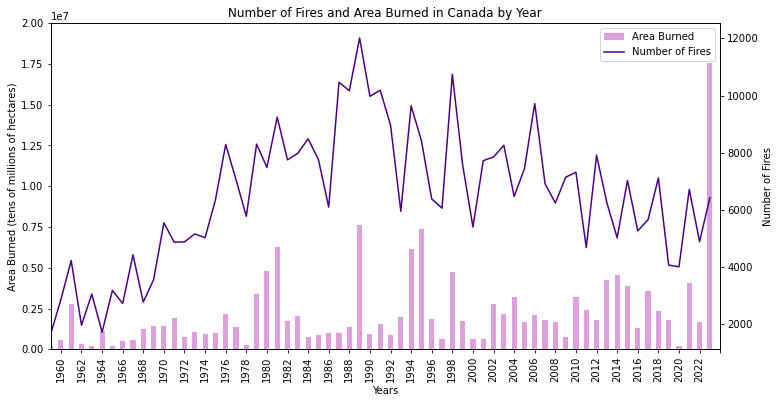

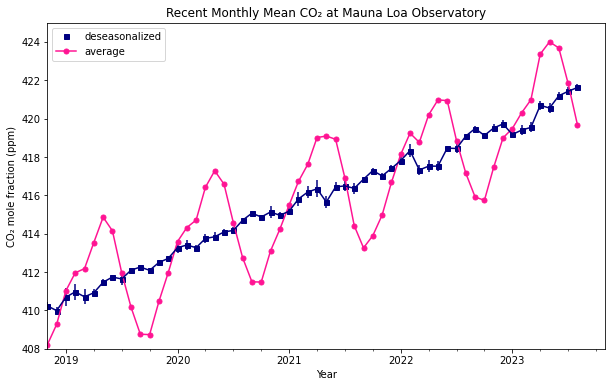

In [16]:
#chatgpt was asked "demonstrate how to load data in python using pandas
#importing necessary modules 
import numpy as np
import pandas as pd

#linking files from directory
wfpath = 'Data/NFDB_point_stats.csv'
co2path = 'Data/co2_mm_mlo.csv'

#cleaning up the data and putting it in dataframes
co2data = pd.read_csv(co2path,
                    delimiter=',', header= 26,
                    parse_dates=[[0,1]]
)

wfdata = pd.read_csv(wfpath,
                    delimiter=',',
                    header= 4,
                    #parse_dates=[0],
                    skipfooter= 3,
                    thousands=',',
                    skipinitialspace=1
)

#renaming column headers to be in line with graphs
wfdata.rename(columns={'YEAR':'Years', 'TOTAL_HA':'Area Burned', 'FIRES':'Number of Fires'}, inplace=True)
co2data.rename(columns={'year_month':'Year'}, inplace=True)

#reversing the data so it reads chronologically
wfdata = wfdata.iloc[::-1]

#Chat GPT was asked: please write a concise even number generator in python
#I then made changes
def yearxval(yr1, yr2):
    count = (yr2 - yr1)
    return [i for i in range(1, 1 + count, 2)]


#plotting the wildfire graph
wfbar = wfdata.plot.bar(x = 'Years', y= 'Area Burned', color = 'plum',
                           rot=90, ylim= (0, 2e7)) #xticks = years(200, 900))
wfline = wfdata.plot.line(x = 'Years', y= 'Number of Fires', ylabel= 'Area Burned (tens of millions of hectares)',
                         c='indigo',
                           figsize= (12, 6), rot=90, title= 'Number of Fires and Area Burned in Canada by Year',
                        secondary_y=True, sharex= 1, ax = wfbar, use_index=False,
                         mark_right= False, xlim= (0,65), xticks = yearxval(1958, 2023)
                         )
wfbar.right_ax.set_ylabel('Number of Fires')

#plotting the co2 graph
co2err = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, yerr= 'unc', legend = False)
co2dses = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, style = 's', ax = co2err)
co2data.plot.line(x = 'Year', y= 'average', c = 'deeppink', style= '-o', ms = 5,
                 title= 'Recent Monthly Mean CO₂ at Mauna Loa Observatory', ylabel= 'CO₂ mole fraction (ppm)',
                    ax = co2dses, xlim = (586, 646), ylim=(408, 425)
                   )


#title should be 
#years should be every 2

#to do: fix x labels, add tail co2 data??, neaten and comment, remove anything unnecessary, add 2022 and 2023, etc :)